# Mid-Course Project

Hi There, and thanks for your help. If you're reading this you've been selected to help on a secret initiative.

You will be helping us analyze a portion of data from a company we want to acquire, which could greatly improve the fortunes of Maven Mega Mart.

We'll be working with `project_transactions.csv` and briefly take a look at `product.csv`.

First, read in the transactions data and explore it.

* Take a look at the raw data, the datatypes, and cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype. Check the memory reduction by doing so.
* Is there any missing data?
* How many unique households and products are there in the data? The fields household_key and Product_ID will help here.

In [1]:
import pandas as pd
import numpy as np

In [2]:
transactions = pd.read_csv(r"C:\Users\pinks\Downloads\Pandas+Course+Resources(1)\Pandas Course Resources\project_data\project_transactions.csv")

In [3]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [4]:
# Check What Are the Datatypes of Each Column

transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int64  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


In [5]:
# Identify Which Columns Can Take Up Necessary Memory and Can Be Downcasted

transactions.describe().round()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2146311.0,2.146311e+06,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0
mean,1056.0,3.404897e+10,390.0,2884715.0,101.0,3.0,3268.0,-1.0,56.0,-0.0,-0.0
std,605.0,4.723748e+09,190.0,3831949.0,1152.0,4.0,9122.0,1.0,27.0,0.0,0.0
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0,1.0,-130.0,1.0,-56.0,-8.0
25%,548.0,3.040798e+10,229.0,917231.0,1.0,1.0,330.0,-1.0,33.0,0.0,0.0
50%,1042.0,3.281176e+10,392.0,1027960.0,1.0,2.0,372.0,0.0,57.0,0.0,0.0
75%,1581.0,4.012804e+10,555.0,1132771.0,1.0,3.0,422.0,0.0,80.0,0.0,0.0
max,2099.0,4.230536e+10,711.0,18316298.0,89638.0,840.0,34280.0,4.0,102.0,0.0,0.0


In [6]:
# Changing Datatypes of Columns DAY, QUANTITY, STORE_ID, and WEEK_NO to Save Memory

transactions = transactions.astype({'DAY': 'int16', 'QUANTITY': 'int32', 'STORE_ID': 'int32', 'WEEK_NO': 'int8'})

transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int16  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int32  
 5   SALES_VALUE        float64
 6   STORE_ID           int32  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int8   
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int16(1), int32(2), int64(3), int8(1)
memory usage: 137.1 MB


In [7]:
# No Missing NA Values

transactions.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [8]:
# Calculate Number of Unique Household Keys

transactions['household_key'].nunique()

2099

In [9]:
# Calculate Number of Unique Product IDs

transactions['PRODUCT_ID'].nunique()

84138

## Column Creation

Create two columns:

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage disount (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0. 
* Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).

Feel free to overwrite the existing transaction DataFrame after making the modifications above.

In [10]:
# Create a Total Discount Column

total_discount = transactions['RETAIL_DISC'] + transactions['COUPON_DISC']

transactions['TOTAL_DISC'] = total_discount

In [11]:
# Create Percentage Discount Column

transactions = transactions.assign(
    PERCENT_DISC=lambda x: (x['TOTAL_DISC'] / x['SALES_VALUE']).abs()
)

transactions['PERCENT_DISC'] = (transactions['PERCENT_DISC']
                                .where(transactions['PERCENT_DISC'] < 1, 1)
                                .where(transactions['PERCENT_DISC'] > 0, 0)
                               )

In [12]:
# Drop RETAIL_DISC, COUPON_DISC, and COUPON_MATCH_DISC

transactions.drop(['RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC'], inplace=True, axis=1)

## Overall Statistics

Calculate:

* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 
* What was the highest quantiy sold for a single item in a single row?

In [13]:
# Total Sales

transactions['SALES_VALUE'].sum()

np.float64(6666243.499999999)

In [14]:
# Total Discount

transactions['TOTAL_DISC'].sum()

np.float64(-1178658.0799999998)

In [15]:
# Overall Percentage Discount

transactions['TOTAL_DISC'].sum() / transactions['SALES_VALUE'].sum()

np.float64(-0.1768099350106248)

In [16]:
# Average of Percentage Discounts

transactions['PERCENT_DISC'].mean()

np.float64(0.2073244407398103)

In [17]:
# Total Quantity Sold

transactions['QUANTITY'].sum()

np.int64(216713611)

In [107]:
# Max Quantity

max_quantity = transactions['QUANTITY'].max()

max_quantity

89638

In [18]:
# The Max Quantity Does Not Have a High Percentage Discount

transactions[transactions['QUANTITY'] == transactions['QUANTITY'].max()] 

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,TOTAL_DISC,PERCENT_DISC
1442095,630,34749153595,503,6534178,89638,250.0,384,73,-13.45,0.0538


In [19]:
# Total Sales Value Per Basket

transactions['SALES_VALUE'].sum() / transactions['BASKET_ID'].nunique()

np.float64(28.61797938516092)

In [20]:
# Total Sales Value Per Household

transactions['SALES_VALUE'].sum() / transactions['household_key'].nunique()

np.float64(3175.9140066698424)

## Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.


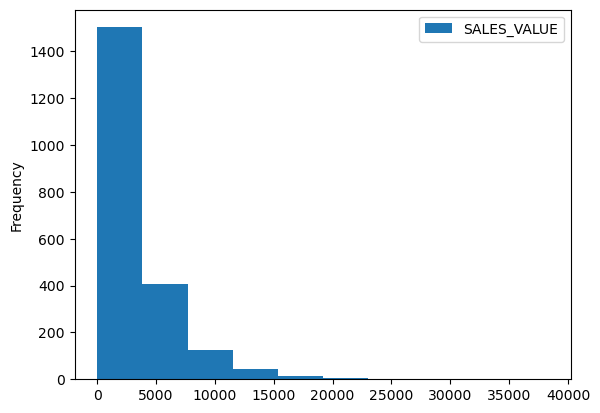

In [21]:
# View Distribution of Total Sales Value Purchased at the Household Level

(transactions
 .groupby('household_key')
 .agg({'SALES_VALUE':'sum'})
 .plot.hist()
);

In [22]:
# Top 10 Households by Quantity Purchased

(transactions.groupby('household_key')
 .agg({'QUANTITY':'sum'})
 .sort_values(by='QUANTITY', ascending=False)
 .head(10)
)

,QUANTITY
household_key,
1023,4479917
755,3141769
1609,2146715
13,1863829
1430,1741892
1527,1734632
1762,1669880
707,1640193
1029,1496204


In [23]:
# Top 10 Households by Sales Value

top_ten_sales = (transactions
                 .groupby('household_key')
                 .agg({'SALES_VALUE':'sum'})
                 .sort_values(by='SALES_VALUE', ascending=False)
                 .head(10)
)

top_ten_sales

,SALES_VALUE
household_key,
1023,38319.79
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
1653,19153.75
1111,18894.72
982,18790.34


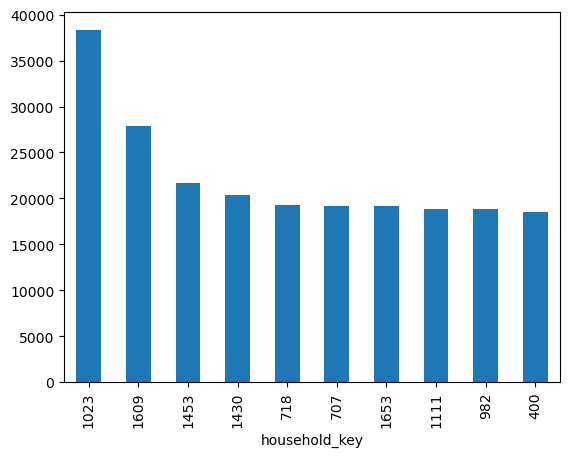

In [105]:
# View the Distribution of the Total Sales Value of the Top Ten Households

top_ten_sales['SALES_VALUE'].plot.bar();

## Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top 10 selling items have a higher than average discount rate?
* What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.

In [25]:
# Top Ten Products by Sales Value

top_ten_products = (transactions
                    .groupby('PRODUCT_ID')
                    .agg({'SALES_VALUE':'sum'})
                    .sort_values(by='SALES_VALUE', ascending=False)
                    .head(10)
                   )

top_ten_products

,SALES_VALUE
PRODUCT_ID,
6534178,420154.13
6533889,42339.31
1029743,33894.75
1082185,24149.79
6533765,23831.14
6534166,23755.70
1106523,22931.01
916122,22749.02
995242,21229.72


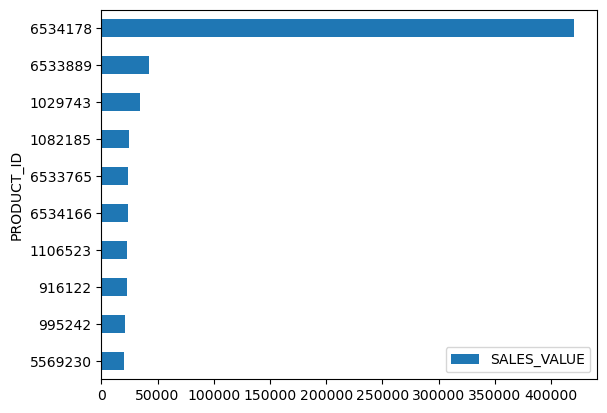

In [26]:
# Bar Graph of Top Ten Products

top_ten_products.sort_values(by='SALES_VALUE').plot.barh();

In [28]:
# Calculate the Total Discount for the Top 10 Products

query_top_products = transactions.query('PRODUCT_ID in @top_ten_products.index')

(query_top_products
 .loc[:, 'TOTAL_DISC']
 .sum()
)/(
 query_top_products
 .loc[:, 'SALES_VALUE']
 .sum()
)

np.float64(-0.10331267387397927)

PRODUCT CSV

In [73]:
product = pd.read_csv(r"C:\Users\pinks\Downloads\Pandas+Course+Resources(1)\Pandas Course Resources\project_data\product.csv")

product

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
...,...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,


In [93]:
# PRODUCT_IDs of the Top Ten Households by Sales Value
# PRODUCT_ID 1082185 is the Most Common PRODUCT_ID in this List

products_by_sales = (transactions
 .query('household_key in @top_ten_sales.index')
 .loc[:, 'PRODUCT_ID']
 .value_counts()
 .head(10)
)

products_by_sales

PRODUCT_ID
1082185    576
1029743    573
6534178    561
6533889    418
1127831    230
951590     202
860776     184
1106523    178
981760     174
9677202    168
Name: count, dtype: int64

In [96]:
# Top 10 Products by Sales in the products.csv Dataset

product.query('PRODUCT_ID in @products_by_sales.index')

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
10630,860776,2,PRODUCE,National,VEGETABLES - ALL OTHERS,CUCUMBERS,36 CT
20973,951590,910,GROCERY,National,BAKED BREAD/BUNS/ROLLS,MAINSTREAM WHITE BREAD,20 OZ
24250,981760,69,GROCERY,Private,EGGS,EGGS - X-LARGE,1 DZ
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
40600,1127831,5937,PRODUCE,National,BERRIES,STRAWBERRIES,16 OZ
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
68952,9677202,69,GROCERY,Private,PAPER TOWELS,PAPER TOWELS & HOLDERS,


In [103]:
# Top 10 Products by Sales with Quantity Values
# 6534178 is the Product with the Highest Quantity

(transactions
.query('PRODUCT_ID in @products_by_sales.index')
.groupby('PRODUCT_ID')
.agg({'QUANTITY':'sum'})
.sort_values(by='QUANTITY', ascending=False)
)

,QUANTITY
PRODUCT_ID,
6534178,180705254
6533889,16904944
1082185,25435
1029743,13991
1106523,9494
981760,9187
951590,6618
860776,6287
1127831,6133
